<a href="https://colab.research.google.com/github/yonehai/ML-labs/blob/main/lab3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving nba.csv to nba.csv
Saving employees.csv to employees.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_employee = pd.read_csv("employees.csv")
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [5]:
df_nba = pd.read_csv("nba.csv")
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [6]:
print(df_employee.isna().sum())
df_employee.dropna(axis=0, inplace=True)
print(df_employee.isna().sum())

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64
First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64


Gender  Team                
Female  Business Development    92645.020408
        Client Services         85742.723404
        Distribution            79812.161290
        Engineering             89708.139535
        Finance                 93483.333333
        Human Resources         89835.878788
        Legal                   91749.242424
        Marketing               97116.555556
        Product                 86333.704545
        Sales                   90055.628571
Male    Business Development    87851.000000
        Client Services         93781.789474
        Distribution            92302.379310
        Engineering             99937.027778
        Finance                 95663.842105
        Human Resources         92149.976744
        Legal                   84491.882353
        Marketing               84745.947368
        Product                 87615.435897
        Sales                   93303.783784
Name: Salary, dtype: float64
Team
Business Development    36844
Client 

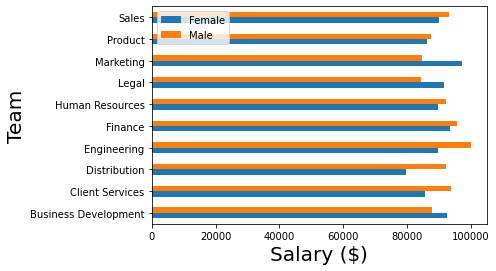

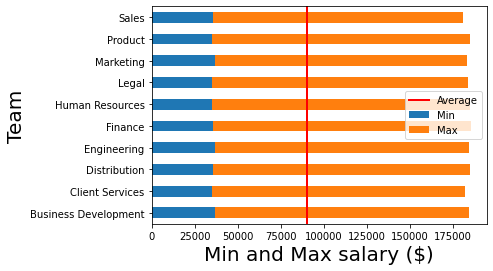

In [14]:
print(df_employee.groupby(['Gender', 'Team'])['Salary'].mean())
df_employee.groupby(['Gender', 'Team'])['Salary'].mean().unstack(level=0).plot(kind='barh')
plt.xlabel("Salary ($)", fontsize=20)
plt.ylabel("Team", fontsize=20)
plt.legend(loc = 2)

print(df_employee.groupby(['Team'])['Salary'].min())
print(df_employee.groupby(['Team'])['Salary'].max())

df_employee.groupby(['Team']).agg({'Salary': [np.min,np.max]}).\
plot.barh(stacked=True)
plt.axvline(df_employee['Salary'].mean(), color='red', linewidth=2)
plt.xlabel("Min and Max salary ($)", fontsize=20)
plt.ylabel("Team", fontsize=20)
plt.legend(['Average','Min', 'Max'])

In [7]:
print(df_nba.isna().sum())
df_nba.dropna(axis=0, inplace=True)
print(df_nba.isna().sum())

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64
Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64


In [8]:
print(df_nba.head())
df_nba['Weight'] = round(df_nba['Weight'] * 0.45359237, 2)

import re
df_nba["ft"] = 0
df_nba['in'] = 0
for i in range(len(df_nba['Height'])):
  m_ft = re.search(r"[1-9]*-", df_nba['Height'].iloc[i])
  df_nba['ft'].iloc[i] = int(m_ft.group()[:-1])
  m_in = re.search(r"-[1-9]*", df_nba['Height'].iloc[i])
  if m_in.group()[1:].isdigit():
    df_nba['in'].iloc[i] = int(m_in.group()[1:])
  else:
    df_nba['in'].iloc[i] = 0

df_nba['Height'] = round((df_nba['ft'] * 0.3048) + (df_nba['in'] * 0.0254), 2) 
del df_nba['ft'], df_nba['in']
print(df_nba.head())

            Name            Team  Number  ... Weight        College     Salary
0  Avery Bradley  Boston Celtics     0.0  ...  180.0          Texas  7730337.0
1    Jae Crowder  Boston Celtics    99.0  ...  235.0      Marquette  6796117.0
3    R.J. Hunter  Boston Celtics    28.0  ...  185.0  Georgia State  1148640.0
6  Jordan Mickey  Boston Celtics    55.0  ...  235.0            LSU  1170960.0
7   Kelly Olynyk  Boston Celtics    41.0  ...  238.0        Gonzaga  2165160.0

[5 rows x 9 columns]
            Name            Team  Number  ...  Weight        College     Salary
0  Avery Bradley  Boston Celtics     0.0  ...   81.65          Texas  7730337.0
1    Jae Crowder  Boston Celtics    99.0  ...  106.59      Marquette  6796117.0
3    R.J. Hunter  Boston Celtics    28.0  ...   83.91  Georgia State  1148640.0
6  Jordan Mickey  Boston Celtics    55.0  ...  106.59            LSU  1170960.0
7   Kelly Olynyk  Boston Celtics    41.0  ...  107.95        Gonzaga  2165160.0

[5 rows x 9 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
print(df_nba.groupby(['Position'])["Age" ,"Height", 'Weight'].mean())
print(df_nba.groupby(['Position'])['Salary'].max())
print(df_nba.groupby(['Position'])['Salary'].min())
print(df_nba.groupby(['Position'])['Salary'].median())

                Age    Height      Weight
Position                                 
C         26.857143  2.071020  114.739388
PF        26.679012  2.011975  108.615556
PG        26.750000  1.888421   86.308026
SF        26.732394  2.010141  100.582254
SG        26.206897  1.969540   93.877356
Position
C     19689000.0
PF    22192730.0
PG    21468695.0
SF    22875000.0
SG    20000000.0
Name: Salary, dtype: float64
Position
C      83397.0
PF    111444.0
PG     55722.0
SF    200600.0
SG     55722.0
Name: Salary, dtype: float64
Position
C     3398280.0
PF    2850000.0
PG    2927470.0
SF    2000000.0
SG    1500000.0
Name: Salary, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


(0.0, 25000000.0)

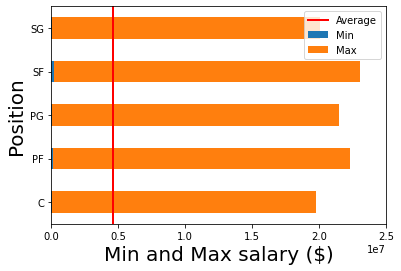

In [10]:
df_nba.groupby(['Position']).agg({'Salary': [np.min,np.max]}).\
plot.barh(stacked=True)
plt.axvline(df_nba['Salary'].mean(), color='red', linewidth=2)
# plt.axvline(df_nba['Salary'].median(), color='black', linewidth=2)

plt.xlabel("Min and Max salary ($)", fontsize=20)
plt.ylabel("Position", fontsize=20)
plt.legend(['Average','Min', 'Max'])
plt.xlim([0, 25000000])

Text(0, 0.5, 'Team')

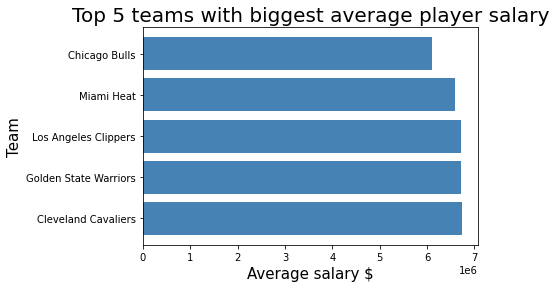

In [11]:
mean_salary_team = df_nba.groupby(['Team'], as_index=False)['Salary'].mean()
mean_salary_team.sort_values(by = ['Salary'], ascending=False, inplace = True)
top5_mean_salary_team = mean_salary_team.head()
plt.barh(top5_mean_salary_team['Team'], top5_mean_salary_team['Salary'],\
         color = 'steelblue')
plt.title('Top 5 teams with biggest average player salary', size = 20)
plt.xlabel("Average salary $", fontsize=15)
plt.ylabel("Team", fontsize=15)

In [12]:
df_employee.to_csv('employee_update.csv')
files.download('employee_update.csv')
df_nba.to_csv('nba_update.csv')
files.download('nba_update.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
df1  = pd.DataFrame({
    "city": ["Lutsk", "Lviv", "Odessa", "Kyiv"],
    "temperature": [25, 14, 30, 24],
})
print(df1)
df2 = pd.DataFrame({
    "city": ["Lutsk", "Lviv", "Donetsk"],
    "humidity": [65, 68, 69],
})
print(df2)
df3 = pd.merge(df1, df2)
print(df3)
df4 = pd.merge(df1, df2, how = 'left')
print(df4)
df5 = pd.merge(df1, df2, how = 'right')
print(df5)
df6 = pd.merge(df1, df2, how = 'outer')
print(df6)

     city  temperature
0   Lutsk           25
1    Lviv           14
2  Odessa           30
3    Kyiv           24
      city  humidity
0    Lutsk        65
1     Lviv        68
2  Donetsk        69
    city  temperature  humidity
0  Lutsk           25        65
1   Lviv           14        68
     city  temperature  humidity
0   Lutsk           25      65.0
1    Lviv           14      68.0
2  Odessa           30       NaN
3    Kyiv           24       NaN
      city  temperature  humidity
0    Lutsk         25.0        65
1     Lviv         14.0        68
2  Donetsk          NaN        69
      city  temperature  humidity
0    Lutsk         25.0      65.0
1     Lviv         14.0      68.0
2   Odessa         30.0       NaN
3     Kyiv         24.0       NaN
4  Donetsk          NaN      69.0
